In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size='6' color='red'>ch10. N차원 배열(Numpy 배열) 다루기</font>
# 4절 복사와 뷰
## 4.1 할당

In [19]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
b=a

In [6]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 2012118169424, numpy.ndarray)

In [7]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 2012118169424, numpy.ndarray)

In [8]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [9]:
np.all(a==b)

True

In [13]:
b.shape = (3,4) #할당 받은 b의 shape

In [14]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 2012118169424, numpy.ndarray)

In [15]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 2012118169424, numpy.ndarray)

In [16]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 4.2 얕은 복사 : 뷰 (View)

In [18]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
# 뷰의 경우 데이터는 놔두고 틀만 복사하기에 reshape과 같은 변수를 사용함면 데이터의 형태는 변하지만 동일한 데이터를 사용한다
c = a.view()

In [21]:
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
id(a), id(c)

(2012151927536, 2012173461968)

In [23]:
a == c

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [24]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [27]:
c[1, ::2] = 9 # 1행의 짝수번째 열 변경(9)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [28]:
a

array([ 0,  1,  2,  3,  4,  5,  9,  7,  9,  9,  9, 11])

## 4.3 깊은 복사

In [40]:
a = np.array([[5, 4, 13, 0],
            [99, 6, 16, 1],
            [20, 5, 14, 0],])
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [41]:
# 독립변수의 가지수가 복수면 변수를 대문자로 짓는다
#X = a[:, :-1] #슬라이싱이 될 때, 뷰가 반환된다 (얕은복사)
X = a[:, :-1].copy() # X = np.array(a[:,:-1], copy=True)와 동일 (깊은복사)
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [42]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [43]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5절 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [1]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [3]:
a[[0,5,9]]

array([ 0, 25, 81])

In [5]:
# 인덱싱 하기 위한 값을 배열로 만듬
i = np.array([0, 1, 1, 9])
a[i] #결과는 i(인덱싱 배열)의 형태를 따라 감

array([ 0,  1,  1, 81])

In [6]:
i = np.array([[0,1],
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [7]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [8]:
a[i] += 10 # 중복은 두번이 되지 않고 한번만 실행
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [13]:
# 색상                R G B
palette = np.array([[0,0,0], #black
                    [255,0,0], #red
                    [0,255,0], #green
                    [0,0,255], #blue
                    [255,255,255]]) #white

In [14]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])

In [18]:
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

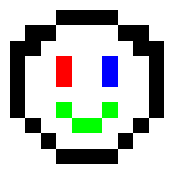

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱


In [20]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [21]:
a%2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [23]:
a[[ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False]]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [24]:
a[a%2==0] #논리 배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [26]:
a[a>15]

array([16, 17, 18, 19])

# 6절 선형대수
- 2차원 넘파이 배열을 행렬
    - 행렬곱 : @
    - 단위행렬 : np.eye(n) : n행 n열 단위행렬
    - 전치행렬 : X.T, X.transpose()

In [27]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [28]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [29]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [30]:
# 정방 행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])
#np.linalg.inv(a) 에러 (정방행렬이 아니라 에러)
a.T @ a #전치행렬을 곱하여 정방행렬로 변경

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [32]:
a @ a.T #전치행렬을 곱하면 정방행렬로

array([[ 6, 12],
       [12, 26]])

# 연습문제
## 실습형
### 다음 코드는 iris 데이터의 독립변수(sepal_length, sepal_width, petal_length) 정보만 갖도록 한 코드입니다. 이를 이용해서 주어진 문제를 해결하세요.
```python
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
```

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

### 1. 각 변수별 평균을 출력하세요.


In [3]:
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

### 2. 처음 다섯개 행을 출력하세요

In [4]:
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 3. 처음 다섯 개 행에서 마지막 열을 제외한 나머지 열을 출력하세요

In [7]:
q3 = iris_data[:5, :-1]
q3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

### 4. 처음 다섯개 행에서 마지막 열만 출력하세요

In [8]:
q4 = iris_data[:5,-1]
q4

array([0.2, 0.2, 0.2, 0.2, 0.2])

### 5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행결과는 2번의 결과와 같아야합니다

### 6. 처음 다섯 개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력하세요

## 문제풀이형
### 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0))의 결과는?
```python
import numpy as np
a = np.arange(12).reshape(3,4)
a

print(a.sum(0))
```
- ① 66
- ② [6 22 38]
- ③ [12 15 18 21]
- ④ 0

### 2. a 데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요
```python
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

a.shape
```
- ① a.ravel()
- ② a.reshape(6,2)
- ③ a.resize((2,6))
- ④ a.T

### 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다. 빈칸에 들어갈 내용으로 옳은 것을 고르세요
```python
import numpy as np
a = np.arange(12).reshape(3,4)
__________________________

결과: array([[0,1,2,3],
       [4,5,6,7]])
```
- ① a[:2]
- ② a[:,:2]
- ③ a[1,2]
- ④ a[1][2]

### 4. 다음 코드의 실행 결과는 ?
```python
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a
```
- ① [0 2 0 0 5]
- ② [1 0 3 0 0]
- ③ [1 2 3 4 5]
- ④ 프로그램 오류, a[1,3,4] = 0으로 코드를 수정해야한다.

### 5. 다음 두 배열 a,b를 출력의 예시처럼 만들고 싶을 때 빈칸에 입력해야 할 내용으로 바른 것은?
```python
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
_______________


결과값:
array([[1, 6],
       [2, 7],
       [3, 8],
       [4, 9],
       [5, 10]])
```
- ① np.r_[a,b]
- ② np.c_[a,b]
- ③ np.ix_(a,b)
- ④ [[a],[b]]